# Loading the Data

In [1]:
# load data

# import the experiment utilities package
import exputils as eu
import numpy as np

def cal_total_reward(event_descr):
    
    experiment_data = event_descr['owner'].experiment_data
    
    for single_exp_data in experiment_data.values():
        for single_rep_data in single_exp_data.repetition_data.values():
            
            single_rep_data.total_reward = np.nansum(single_rep_data.reward_per_episode)     



# create an experiment data loader, by default it will load data from '../experiments'
experiment_data_loader = eu.gui.jupyter.ExperimentDataLoaderWidget()

# add calculatation of extra statistics 
#experiment_data_loader.on_experiment_data_loaded(cal_total_reward)

display(experiment_data_loader)
experiment_data_loader.load_data()

ExperimentDataLoaderWidget(children=(Box(children=(Button(description='Update Descriptions', layout=Layout(hei…

Output()

We can access the data via the `experiment_data` property of the `ExperimentDataLoaderWidget`.

The data is composed of dictionaries that hold the individual data for each repetition.

# Plotting the Data

The exputils have several builtin plotting functions. These can be accessed via the `ExperimentDataPlotSelectionWidget`.

Write in the 'Data Sources' field which data you would like to plot. Then you can select a plotting function and change its configuration.

Examples: 
 * plotting the 'reward_per_episode' with the 'plotly_meanstd_scatter' plotter shows the performance of each experiment in a line graph
 * plotting the 'total_reward' with the 'plotly_box' or 'plotly_meanstd_bar' compares the total reward that was collected during each reward
 
If you want to 'save' a plot, to use it later again, then use the code production to generate a cell below the `ExperimentDataPlotSelectionWidget` that has the code to plot the figure again. The cells in the subchapters 'Total Reward' and 'Reward per Episode' at the end of this notebook were generated by this method. After saving the jupyter notebook all your configurations will be saved.

In [2]:
# experiment data selection plotter that takes as input the data loader to plot its loaded data
experiment_data_plotter = eu.gui.jupyter.ExperimentDataPlotSelectionWidget(experiment_data_loader)
display(experiment_data_plotter)

ExperimentDataPlotSelectionWidget(children=(HBox(children=(Label(value='Data Sources:', layout=Layout(min_widt…

Output()

## Observation

When using the 10x learning rate for the mean and var in the urbf, we can surpass the mlp performance.


In [4]:
### Execution time

raw_data = experiment_data_loader.experiment_data['000017']['repetition_data'][1]
raw_data.keys()

#print(raw_data['duration'])


dict_keys(['var0', 'mean23', 'mean37', 'var25', 'var31', 'var19', 'var18', 'var30', 'var24', 'mean36', 'mean22', 'var1', 'var3', 'mean34', 'mean20', 'var32', 'var26', 'var27', 'var33', 'mean21', 'mean35', 'var2', 'var6', 'mean19', 'mean31', 'mean25', 'var37', 'var23', 'var22', 'var36', 'mean24', 'mean30', 'mean18', 'var7', 'var5', 'mean26', 'mean32', 'var20', 'var34', 'var35', 'var21', 'mean33', 'mean27', 'var4', 'mean4', 'train_loss', 'mean40', 'mean54', 'mean68', 'var46', 'var52', 'var53', 'var47', 'mean69', 'mean55', 'mean41', 'mean5', 'mean7', 'mean57', 'mean43', 'var51', 'var45', 'var44', 'var50', 'mean42', 'mean56', 'mean6', 'mean2', 'mean52', 'mean46', 'var68', 'var54', 'var40', 'var41', 'var55', 'var69', 'mean47', 'mean53', 'mean3', 'mean1', 'duration', 'test_loss', 'mean45', 'mean51', 'var43', 'var57', 'var56', 'var42', 'mean50', 'mean44', 'mean0', 'mean61', 'mean49', 'var67', 'var66', 'mean48', 'mean60', 'mean62', 'var70', 'var64', 'var58', 'train_loss_fine', 'var59', 'var65'

## Mean value

In [5]:
## plotting
import numpy as np
import plotly.graph_objects as go

#data = experiment_data_loader.experiment_data['000017']['repetition_data'][1]


means = []

for key in raw_data.keys():
    if "mean" in key:
        means.append(raw_data[key])

    
data = np.stack(means, axis=1)
print(data.shape)
#data = np.expand_dims(data, axis=1)

# Preparing data for plotting
epochs = np.arange(1, data.shape[0])
traces = []
for i in range(data.shape[1]):
    traces.append(go.Scatter(x=epochs, y=data[:, i], mode='lines', name=f'Value {i+1}'))

# Plotting with Plotly
layout = go.Layout(title='Change of 16 Values over 500 Steps',
                   xaxis=dict(title='Epoch'),
                   yaxis=dict(title='Value'),
                   template='plotly_dark')

fig = go.Figure(data=traces, layout=layout)
fig.show()



(1000, 72)


## Var Values

In [6]:
### plot
import numpy as np
import plotly.graph_objects as go


#data = experiment_data_loader.experiment_data['000017']['repetition_data'][1]



variances = []

for key in raw_data.keys():
    if "var" in key:
        variances.append(raw_data[key])

    
data = np.stack(variances, axis=1)

# Preparing data for plotting
epochs = np.arange(1, data.shape[0])
traces = []
for i in range(data.shape[1]):
    traces.append(go.Scatter(x=epochs, y=data[:, i], mode='lines', name=f'Value {i+1}'))

# Plotting with Plotly
layout = go.Layout(title='Change of 16 Values over 500 Steps',
                   xaxis=dict(title='Epoch'),
                   yaxis=dict(title='Value'),
                   template='plotly_dark')

fig = go.Figure(data=traces, layout=layout)
fig.show()

## KL Distance

72
72
-1.4285715
36
torch.Size([36, 36])


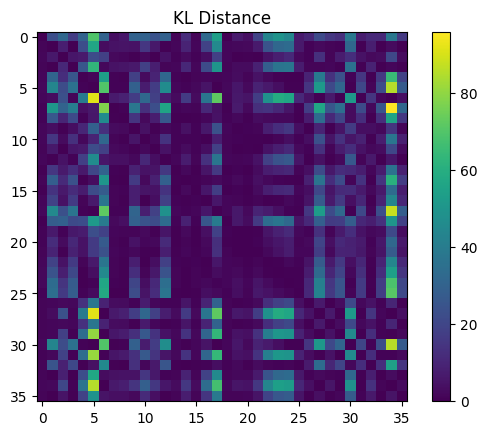

torch.Size([36, 36])


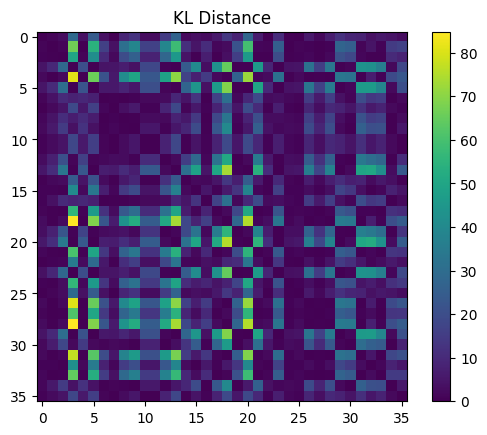

In [7]:
import torch
import matplotlib.pyplot as plt


def kl_dist(param1,param2):
    mu1,var1 = param1
    mu2,var2 = param2
    
    return torch.log(var2/var1) + (var1**2 + (mu1 - mu2)**2)/(2*(var2**2)) - 1/2

epoch = 500

print(len(means))
print(len(variances))

print(means[0][epoch])

dims = 2
neurons_per_input = (len(means)//dims)

print(neurons_per_input)

for dim in range(dims):
    kl = torch.zeros((neurons_per_input,neurons_per_input))
    print(kl.shape)
    for i in range(neurons_per_input):
        mu1 = torch.tensor(means[neurons_per_input*dim +i][epoch])
        var1 = torch.tensor(variances[neurons_per_input*dim +i][epoch])

        for e in range(neurons_per_input):
            mu2 = torch.tensor(means[neurons_per_input*dim + e][epoch])
            var2 = torch.tensor(variances[neurons_per_input*dim +e][epoch])
            
            #print(type(mu2))
            #print(mu2)

            dist = kl_dist((mu1,var1),(mu2,var2))
            
            kl[i,e] = dist
            
    # Visualizing the tensor with a colorful colormap
    plt.imshow(kl, cmap='viridis')
    plt.colorbar()
    plt.title("KL Distance")
    plt.show()

